# Dan Crouthamel – SMU NLP Course — Homework 7

## Assignment Objectives

Cluster the reviews that you collected in homework 5, by doing the following:

1.  In Python, select any one of the clustering methods covered in this course. Run it over the collection of reviews, and show at least two different ways of clustering the reviews, e.g., changing k in k-Means clustering or changing where you “cut” in Agnes or Diana.

2.  Try to write a short phrase to characterize (give a natural interpretation of) what each cluster is generally centered on semantically. Is this hard to do in some cases? If so, make note of that fact.  

3.	Explain which of the two clustering results from question 1 is preferable (if one of them is), and why.

Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings.

## Solution

Homework 5 consisted of a data set having 100 rows, containing both a positive and negative sentiment review for 50 different Crime movies. I'm going to create a new dataset of 200 different movies, across many categories or genres. The url parameter below will be formatted to return "Feature Films, User Rating between 7 and 10, Rating Count at least 50,000 (Sorted by IMDb Rating Descending)". I'm trying to get a dataset with many words in the review for each film. I'll come back to sentiment in HW8 because I have some ideas on that I'd like to try.

The assignment asks us to look at alternating K to change our clustering. I think we can also look at how we vectorize our words and see what impact that has on our clustering. That's the rabbit hole I ended up going down, but learned a lot from it. It's important to understand how we encode our words. I think the problem we are trying to solve will dictate how we encode our data. Fun exercise!

The following 4 options will be explored, which cover what I like to call "frequency" based vectorization and word vectors. With frequency based vectorization, the clusters aren't going to represent anything semantically because the transformation of words to numbers is based on frequency. This would be my answer to question 2 above. With the word vector approach, the clusters will represent words based on their similarity. So does this help better represent reviews that are similar? I don't know. Still a lot more to learn!! I need to better understand how these word vectors were trained.

* CountVectorizer - a bag of words model (K = 5 and 10)

The assignment is concluded at this point. The remainder are other options I explored.

* TfidfVectorizer - a bag of words model with tfidf weighting
* Spacy - use Spacy to vectorize each review by taking an average of the word vectors
* Gensim and GloVe - use Gensim to vectorize each review by taking an average of the word vectors

### Library Imports

In [3]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import nltk

### Scrape Data from IMDB

The code below will scrape the *longest* review from 200 different moviews. Part of this code was taken from the link below, along with modifications I made to it, e.g., compute longest review, etc.

https://shravan-kuchkula.github.io/scrape_imdb_movie_reviews/#

In [ ]:
# As mentioned in HW5, some of the code below is from the link below. I made further modifications.
# https://shravan-kuchkula.github.io/scrape_imdb_movie_reviews/#

def getSoup(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    return soup

def getMovieTags(soup):
    tags = soup.find_all('a', attrs={'class': None})
    tags = [tag.attrs['href'] for tag in tags if tag.attrs['href'].startswith('/title') & tag.attrs['href'].endswith('/')]
    
    return list(dict.fromkeys(tags))

def getLongestReviewText(soup):
    user_reviews = [tag.getText().strip() for tag in soup.find_all('div', attrs={'class':'text show-more__control'})]

    return max(user_reviews, key=len)

def getMovieGenres(soup):
    genres = [tag.getText().strip() for tag in soup.find_all('span', attrs={'class':'genre'})]
    
    return genres

def getMovieNames(soup):
    names = soup.find_all('img', attrs={'class': 'loadlate'})

    return [tag.attrs['alt'] for tag in names]

base_url = 'https://www.imdb.com'

search_url = '''https://www.imdb.com/search/title/?title_type=feature&user_rating=7.0,10.0
&num_votes=50000,&sort=user_rating,desc&count=200'''

# get the soup object for main api url
movies_soup = getSoup(search_url)

# Scrape IMDB and get movie information
movie_tags = getMovieTags(movies_soup)
movie_names = getMovieNames(movies_soup)
movie_genres = getMovieGenres(movies_soup)
movie_links = [base_url + tag for tag in movie_tags]

movie_review_links = [base_url + tag + 'reviews' for tag in movie_tags]
movie_soups = [getSoup(link) for link in movie_review_links]
review_texts = [getLongestReviewText(movie_soup) for movie_soup in movie_soups]

# Create a dataframe with all the movie info
columns = ['Movie Name', 'Movie Genres', 'Movie Review URL', 'Longest Review Text']
df = pd.DataFrame(columns=columns)
df['Movie Name'] = movie_names
df['Movie Genres'] = movie_genres
df['Movie Review URL'] = movie_review_links
df['Longest Review Text'] = review_texts

# >>> Save for HW8, bring back sentiment for prediction
# # p_movie_review_links = [base_url + tag + 'reviews?sort=helpfulnessScore&dir=desc&ratingFilter=10' for tag in movie_tags]
# # n_movie_review_links = [base_url + tag + 'reviews?sort=helpfulnessScore&dir=desc&ratingFilter=1' for tag in movie_tags]

# movie_review_links = []
# cnt = 0
# print(type(movie_review_links))
# for tag in movie_tags:
#     if cnt % 2 == 0:
#         movie_review_links.append(base_url + tag + "reviews?sort=helpfulnessScore&dir=desc&ratingFilter=10")
#         #movie_review_links[cnt] = base_url + tag + 'reviews?sort=helpfulnessScore&dir=desc&ratingFilter=10'
#     else:
#         movie_review_links.append(base_url + tag + "reviews?sort=helpfulnessScore&dir=desc&ratingFilter=2")
#         #movie_review_links[cnt] = base_url + tag + 'reviews?sort=helpfulnessScore&dir=desc&ratingFilter=3'
#     cnt += 1
#     print(movie_review_links[cnt])

# #movie_review_links = p_movie_review_links + n_movie_review_links
# movie_soups = [getSoup(link) for link in movie_review_links]
# review_texts = [getLongestReviewText(movie_soup) for movie_soup in movie_soups]
# #review_sentiment = np.array(['positive'] * 200) + np.array(['negative'] * 200)
# review_sentiment = np.array(['positive', 'negative'] * 100)

# columns = ['Movie Name', 'Movie Sentiment', 'Movie Review URL', 'Longest Review Text']
# df = pd.DataFrame(columns=columns)
# df['Movie Name'] = movie_names
# df['Movie Sentiment'] = review_sentiment
# df['Movie Review URL'] = movie_review_links
# df['Longest Review Text'] = review_texts
# >>>

# Save the dataframe to a csv file
df.to_csv('reviews_long.csv', index=False)
df.head()

### Feature Engineering

Next we'll be using code from Chapter 7, 'Text Similarity and Clustering' by Sarkar. First let's create a function that will tokenize and clean up our user review text, converting it to lower case, striping out punctuation, and removing stopwords, etc.

The use of np.vectorize below is not related word embeddings or vectorization (converting words to numbers, or encoding). 'Vectorize' below is a numpy utility function that basically performs a for loop for each element passed into it. So we pass in the column 'Longest Review Text', and we execute normalize_document for each row. 'norm_text' is a numpy array of length 200. Think of each review as a document.

In [4]:
#from nltk.stem.snowball import SnowballStemmer

# Read in the data saved off from above
df = pd.read_csv('reviews_long.csv')

stop_words = nltk.corpus.stopwords.words('english')
#stemming = SnowballStemmer('english')

def normalize_document(doc):
    # lowercase and remove special characters to form a normalized document
    doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()

    # tokenize document
    tokens = nltk.word_tokenize(doc)
    
    # filter out stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Remove numbers
    filtered_tokens = [token for token in filtered_tokens if not token.isdigit()]

    # Remove short tokens
    filtered_tokens = [token for token in filtered_tokens if len(token) > 2]

    # stem tokens - Skipping for now
    #filtered_tokens = [stemming.stem(token) for token in filtered_tokens]

    # re-create a normalized document
    doc = ' '.join(filtered_tokens)
    return doc

normalize_text = np.vectorize(normalize_document)
norm_text = normalize_text(list(df['Longest Review Text']))

print(type(norm_text),len(norm_text))

<class 'numpy.ndarray'> 200


In [17]:
from textblob import TextBlob

review = TextBlob(norm_text[3])

print(review.sentiment)

test = df['Longest Review Text'][3]
test = TextBlob(test)
print(test.sentiment)

df['Longest Review Text'][3]

Sentiment(polarity=0.04514219957257932, subjectivity=0.5325065757027779)
Sentiment(polarity=0.05577228950824457, subjectivity=0.5397530278710052)


'I got to see The Dark Knight on Wednesday night, the reason though why I\'m writing this movie comment this late is because I didn\'t wanna just jump and say this movie was awesome, I wanted to think it through, still today, I can\'t stop thinking about this movie! The Dark Knight lives up to it\'s hype and goes beyond it, this is the Batman movie that goes where no other Batman movie has gone before. It gave us a real sold story, we are finally told why the villains are the way they are, how all the injustice in the world can get underneath Batman\'s skin, how you have to believe that people still have faith in good on Earth. Heath Ledger, I absolutely loved Jack Nicolson\'s performance in the 1989 film, when I first read that Heath was signed onto The Dark Knight, I was like "What are they, kidding?", once you see The Dark Knight... Heath was incredible! I\'m not going to compare Jack and Heath\'s performance, because they were two different versions of the Joker, but Heath\'s Joker

### Word Embeddings/Vectorization

Now that we have our corpus of reviews, we'll need to convert these strings to vectors of numbers in order to make use of them in KMeans clustering and other algorithms. Let's consider a few different ways to do this.

#### Bag of Words and Bag of N-Grams Model (Counter Vectorizer)

I like to think of Bag of Words as an matrix, where x is our documents, and y are the words across all documents. The value in the matrix would represent the number of times y appears in x.

The order of words is not considered in this model. We can use N-grams to consider words in sequence. This is supported in the CountVectorizer class using the ngram_range parameter.

A disadvantage to the Bag of Words model is that is not necessarily a measure of the *importance* of a word. There may be words important to a given document, but don't appear across the entire corpus.

#### TF-IDF Model - Still considered a bag of words model
TF-IDF has two components, consider it a product of two metrics.

1) Term Frequency (TF) - The number of times a word appears in a document. It's what the Bag of Words model is based on.

2) Inverse Document Frequency (IDF) - Mathematically, we take the number of documents and divide it by the term frequency of the word in a given document + 1 (The phantom document that contains all words). We then take the log of that and add 1. See Chapter 4 of Sarkar's book :)

For this assignment, I will take a look at both models and vary K between them.


#### CountVectorizer - Bags of Words
Below we'll use the CountVectorizer to create our bag of words model. To accomplish this, we'll set min_df=0 and max_df=1.0. Additionally, no ngrams will be considered, only unigrams. See the documentation for more details.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ['film', 'movie', 'films', 'movies']

cv = CountVectorizer(min_df=0, max_df=1., stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_text)

print(cv_matrix.shape)

(200, 16173)


Above I additionally added films and movies to our list of stop words. We see that the shape of our matrix is 200 x 16173. That's 200 documents with 16173 unique words. Let's take a peak at some of the features. Below we output 10 sample features to verify we have words.

In [4]:
print(cv.get_feature_names()[100:110])

['absolves', 'absorb', 'absorbed', 'absorbing', 'abstract', 'absurd', 'absurdity', 'absurdum', 'abundance', 'abuse']


Let's perform K-means clustering on our data encoded by CountVectorizer, and then output what clusters our movies belong to based on user reviews. The code below was taken from our textbook and I've added some additional info to compute silhoutte scores. Some notes on what the code is doing:

1. Using k = 5
2. The output shows Cluster Number, Silhouette Score, and the number of movies in each cluster
3. The output is limited to 20 movies per cluster
4. Display top 50 features (words) in each cluster

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

feature_names = cv.get_feature_names()
topn_features = 50
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(cv_matrix, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1 : 0.11667489014026894
Cluster Size 2
Key Features: ['stewart', 'hitchcock', 'vertigo', 'scottie', 'window', 'first', 'see', 'one', 'rear', 'great', 'scene', 'even', 'way', 'work', 'audience', 'apartment', 'problem', 'think', 'perfect', 'character', 'point', 'sees', 'shot', 'several', 'view', 'suspense', 'color', 'people', 'miss', 'apartments', 'characters', 'restricted', 'performance', 'could', 'murderer', 'set', 'aulier', 'jimmy', 'wife', 'make', 'making', 'master', 'use', 'two', 'night', 'glass', 'voyeur', 'judy', 'decision', 'becomes']
Popular Movies: ['Vertigo', 'Rear Window']
--------------------------------------------------------------------------------
CLUSTER #2 : 0.05895431663688708
Cluster Size 193
Key Features: ['one', 'like', 'story', 'time', 'even', 'would', 'also', 'first', 'well', 'much', 'best', 'characters', 'character', 'scene', 'life', 'two', 'see', 'way', 'many', 'people', 'man', 'great', 'good', 'love', 'really', 'make', 'never', 'world', 'could', 'ever

Above we see we don't have very good distribution of movies across our clusters. But I think this makes sense. The matrix we feed into K-means is simply a count matrix. One cluster has 193 movies in, reviews that all share the same common words. The other clusters with just a handful of movies in them are like that because they have some words that aren't so common. For example, take a look a cluster 4, it shows the words 'mjolnir' and 'instalment'. The only movie review with those words is the one from the movie 'Avengers: Infinity War'.

Let's change the number of clusters to 10 and see what happens.

In [6]:
NUM_CLUSTERS = 10
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

feature_names = cv.get_feature_names()
topn_features = 50
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(cv_matrix, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1 : 0.0
Cluster Size 1
Key Features: ['fletcher', 'neyman', 'chazelle', 'get', 'whiplash', 'like', 'music', 'even', 'students', 'plays', 'one', 'play', 'playing', 'since', 'drums', 'conservatory', 'genre', 'school', 'point', 'set', 'must', 'characters', 'life', 'course', 'way', 'back', 'would', 'jazz', 'really', 'realistic', 'much', 'things', 'internet', 'lawsuit', 'funny', 'may', 'various', 'obsessed', 'critics', 'also', 'see', 'appalling', 'come', 'black', 'agrees', 'rave', 'blackly', 'teller', 'seeks', 'best']
Popular Movies: ['Whiplash']
--------------------------------------------------------------------------------
CLUSTER #2 : 0.16322921336599486
Cluster Size 2
Key Features: ['jones', 'one', 'raiders', 'indiana', 'like', 'last', 'even', 'action', 'crusade', 'seen', 'ark', 'best', 'remember', 'much', 'temple', 'fun', 'time', 'nazis', 'indy', 'doom', 'cgi', 'would', 'scenes', 'adventure', 'harrison', 'actually', 'really', 'see', 'lost', 'adventures', 'ford', 'may', 'mind'

Above we see that we still have 1 large cluster of 190 movies. The cluster for 'Avengers: Infinity War' is still there, and now we have a few more clusters with 1 or 2 movies each. Again, this makes sense to me. As we increase K we are going to continue to split up that cluster of 190 movies into smaller clusters which share similar words in the reviews.

Let's do an elbow plot to see if we can find an optimal value for K. 

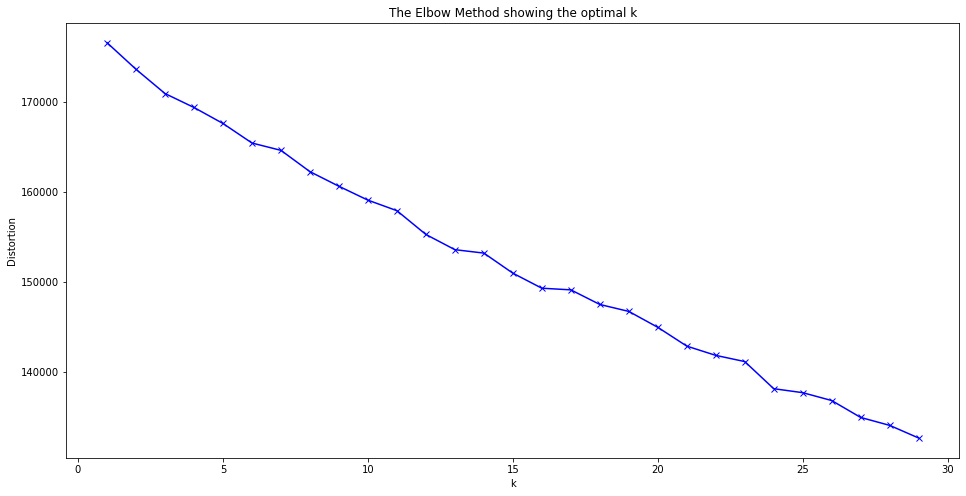

In [7]:
import matplotlib.pyplot as plt

distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000, n_init=50, random_state=42)
    kmeanModel.fit(cv_matrix)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Above we see that distortion (which is a measure of distance from the cluster centroid) continuously decreases. There is no observed elbow and I think that meaks sense. It will just continue to found more clusters.

So while the assigngment suggests changing k, I think it's better to change how we encode our data to see how clustering changes. To answer question 3, I don't think one clustering is more preferable than another here. It really depends on what question we are trying to answer.

I think I've answered what the assignment was looking for up until this point. The remaning is to observe how encoding our data differently affects clustering. Let's take a look at TF-IDF.

#### TfIdf Vectorizer

Below we create a vectorizer to consider unigrams, bi-grams, and trigrams. These features need to occur in at least 10 moview reviews and at most in 70% of the moview reviews. These are completely arbirtrary and can be changed.

Please see below for more info on the TfIdf vectorizer.  

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ['film', 'movie', 'films', 'movies']

tf = TfidfVectorizer(ngram_range=(1,3), min_df=10, max_df=0.7, stop_words=stop_words, norm='l2')
tf_matrix = tf.fit_transform(norm_text)

print(tf_matrix.shape)

(200, 1485)


Above we see we have a lot less features (1485 vs 16173) compared using CountVectorizer, which is expected. Words need to appear in at least 10 documents, and then  no more than 70% of the time so that will reduce the number of words (features). Let's see how it performs in K-means clustering, using k = 10.

In [9]:
NUM_CLUSTERS = 10
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(tf_matrix)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

feature_names = tf.get_feature_names()
topn_features = 50
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(tf_matrix, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1 : 0.0029470349737779496
Cluster Size 21
Key Features: ['scene', 'window', 'character', 'audience', 'way', 'murder', 'two', 'first', 'know', 'people', 'think', 'good', 'see', 'could', 'man', 'car', 'tony', 'perfect', 'guy', 'look', 'suspense', 'well', 'great', 'also', 'wife', 'jack', 'around', 'yet', 'many', 'woman', 'telling', 'bad', 'really', 'take', 'plot', 'makes', 'much', 'make', 'violent', 'bit', 'fact', 'love', 'made', 'let', 'right', 'behind', 'everything', 'quite', 'thinking', 'room']
Popular Movies: ['The Silence of the Lambs', 'The Prestige', 'Gone Girl', 'Gangs of Wasseypur', 'PK', 'Monty Python and the Holy Grail', 'Andhadhun', "Singin' in the Rain", 'Vertigo', 'North by Northwest', 'A Clockwork Orange', 'My Neighbor Totoro', 'The Shining', 'Psycho', 'Once Upon a Time in America', 'Three Billboards Outside Ebbing, Missouri', 'The Invisible Guest', 'Avengers: Infinity War', 'Avengers: Endgame', 'Rear Window']
-------------------------------------------------------

Above we see a different distribution of movies across clusters. Cluster #3 is interesting in that it pulled out the Batman related movies, but that's because it probably has a unique set of words specific to those movies. Let's think about what is going on here. We are still clustering based on some frequency distribution of words, within the document and across documents. The reviews for the Batman movies probably use similar words, like maybe Batman!

#### Ward's Agglomerative Hierarchical Clustering

Another thing we can try is Ward's Agglomerative Hierarchical Clustering. Code below is taken from our textbook again, modified to show all 200 movies and we'll apply it to the tfidf encoded matrix we created above.

In [10]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity


def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(fileName, linkage_matrix, movie_data, p=200, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['Movie Name'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig(fileName, dpi=200)


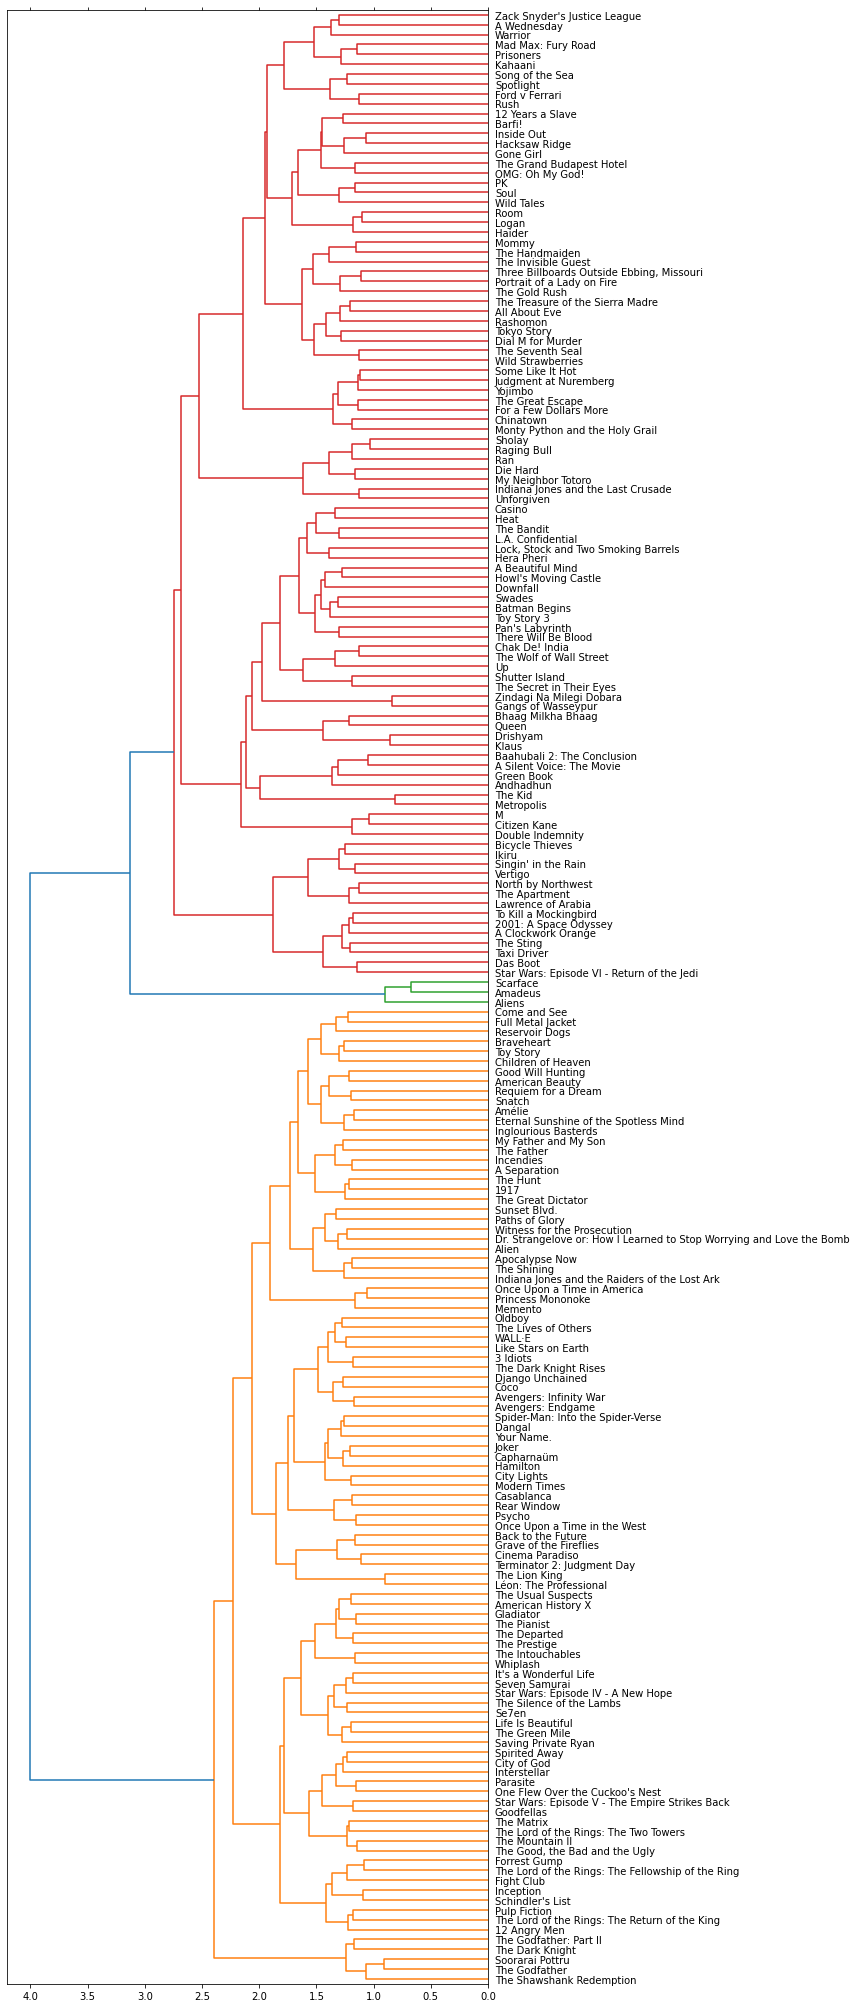

In [11]:

linkage_matrix = ward_hierarchical_clustering(tf_matrix)

plot_hierarchical_clusters('movie_hierachical_clusters.png',
                           linkage_matrix,
                           p=200,
                           movie_data=df,
                           figure_size=(12, 28))

Above we find an interesting clustering of our movie set. Is it a good clustering? Not sure if I find it very useful.

#### Spacy

Another approach we could take is to look at word vectors using Spacy. Below we load a pretrained model and use it to find vectors for each document. The vector at the document level is an average of the word vectors that make up the document, or in this case a review. In the commented code below you can see that I verify that by computing a word vector for each word in a review (document), and then averaging those vectors to get a document level vector.

In [12]:
import spacy

# Load pretrained model
nlp = spacy.load('en_core_web_lg')

# Here we loop over each doc and compute the vector for that doc
spacy_doc_matrix = [nlp(str(doc)).vector for doc in norm_text]

print(len(spacy_doc_matrix))

# docs = df['Longest Review Text'].tolist()
# def token_filter(token):
#     return not (token.is_punct | token.is_space | token.is_stop | len(token.text) <= 4)

# my_filtered_tokens = []
# for doc in nlp.pipe(docs):
#     tokens = [token.lemma_ for token in doc if token_filter(token)]
#     my_filtered_tokens.append(tokens)


# # Here we create a vector for each word, and then average them for a given document.
# cnt = 0
# features = []

# for doc in norm_text:
#     vectors = []
    
#     for word in doc.split():
#         cnt = cnt + 1
#         #print(nlp(word).vector)
#         vectors.append(nlp(word).vector)

#     vectors = np.asarray(vectors)
#     avg_vec = vectors.mean(axis=0)

#     features.append(avg_vec)

# print(cnt)
# print(len(features))
# print((np.array(spacy_doc_matrix) == np.array(features)))

200


Above we see that our feature matrix is a size of 200, 1 vector for each document. Let's use this instead in K-means clustering. Note that below we can't output feature names corresonding to words like we did above with CountVectorizer and TfidfVectorizer. In this case, our features are document vectors.

In [13]:
NUM_CLUSTERS = 10
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(spacy_doc_matrix)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

#feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(spacy_doc_matrix, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    #print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1 : 0.026709728
Cluster Size 18
Popular Movies: ['Bicycle Thieves', 'Mad Max: Fury Road', 'Metropolis', 'Ikiru', 'Princess Mononoke', '2001: A Space Odyssey', 'Spirited Away', 'Soul', 'Come and See', 'Seven Samurai', "Pan's Labyrinth", 'Rear Window', 'The Seventh Seal', 'Modern Times', 'Apocalypse Now', 'Heat', 'My Neighbor Totoro', 'Toy Story']
--------------------------------------------------------------------------------
CLUSTER #2 : 0.060910836
Cluster Size 18
Popular Movies: ['The Apartment', 'Reservoir Dogs', 'Forrest Gump', 'Klaus', 'Once Upon a Time in America', 'Andhadhun', 'American Beauty', 'Three Billboards Outside Ebbing, Missouri', 'Rashomon', 'Requiem for a Dream', 'Hacksaw Ridge', 'Prisoners', 'Avengers: Endgame', 'Avengers: Infinity War', 'Monty Python and the Holy Grail', 'The Shining', 'The Dark Knight', 'Gone Girl']
--------------------------------------------------------------------------------
CLUSTER #3 : 0.025016775
Cluster Size 33
Popular Movies: ['Lo

Above we see that we have a different distribution clusters. What do they represent? It's hard to say. It's based on averaging word vectors for a given document. Are the reviews similar?

Let's generate an elbow plot and see if we can identify an optimal number of clusters.

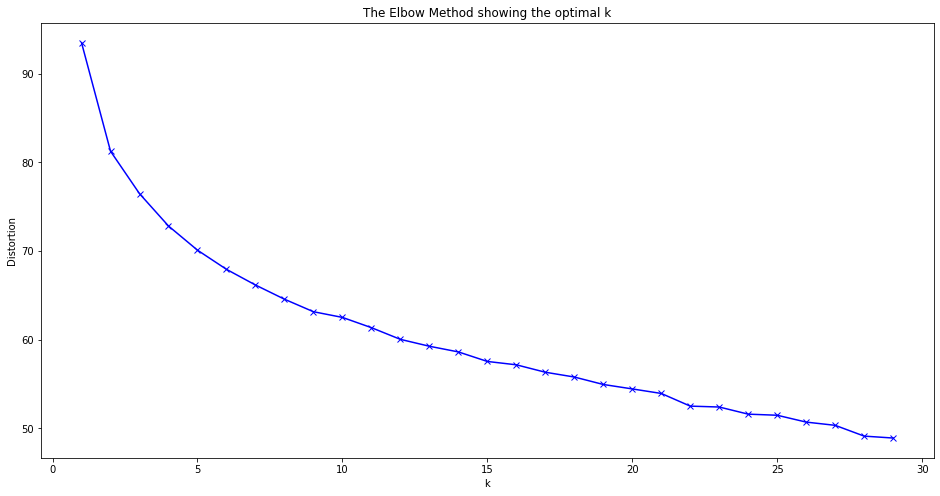

In [14]:
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000, n_init=50, random_state=42)
    kmeanModel.fit(spacy_doc_matrix)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The plot above looks more like an elbow and shows that we can probably cut it off at 10.

#### GloVe vectors

The last thing I'd like to try is using GloVe vectors.

https://nlp.stanford.edu/projects/glove/

In [15]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# This was done the first time to create the file
# glove_file = datapath('D:/Projects/Data/glove.6B/glove.6B.100d.txt')
# word2vec_glove_file = get_tmpfile("D:/Projects/Data/glove.6B/glove.6B.100d.word2vec.txt")
# glove2word2vec(glove_file, word2vec_glove_file)

word2vec_glove_file = datapath("D:/Projects/Data/glove.6B/glove.6B.100d.word2vec.txt")
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

C:\Users\dancr\miniconda3\envs\NLP\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


The code below will be used to find the word vectors for each word in each review, and then average those word vectors for a review. Note the try/except block in the code. I do this because some of the words in our review are not in the GloVe model, so I just ignore those words for now.

In [16]:
cnt = 0
miss_cnt = 0
wv_features = []

for doc in norm_text:
    wv_vectors = []
    
    for word in doc.split():
        cnt = cnt + 1
        #wv_idx = model.wv.key_to_index[word]
        try:
            wv_idx = model.key_to_index[word]
        except KeyError:
            miss_cnt = miss_cnt + 1
            continue
        wv_vectors.append(model.vectors[wv_idx])

    wv_vectors = np.asarray(wv_vectors)
    avg_vec = wv_vectors.mean(axis=0)

    wv_features.append(avg_vec)

print(cnt)
print(miss_cnt)
print(len(wv_features))

94164
727
200


The output above shows we have 94K words, of which 727 couldn't be found in the GloVe model. Not too bad. The 200 represents the number of features, which again are our document vectors.

Let's conclude by doing K-means on these document vectors.

In [18]:
NUM_CLUSTERS = 10
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(wv_features)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

#feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(wv_features, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    #print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1 : -0.008315779
Cluster Size 8
Popular Movies: ['Full Metal Jacket', 'Hacksaw Ridge', 'Gone Girl', 'Saving Private Ryan', 'Das Boot', 'The Sting', 'Paths of Glory', 'The Invisible Guest']
--------------------------------------------------------------------------------
CLUSTER #2 : 0.03983075
Cluster Size 32
Popular Movies: ['Chak De! India', 'Eternal Sunshine of the Spotless Mind', 'Soul', 'Oldboy', 'The Good, the Bad and the Ugly', 'OMG: Oh My God!', 'The Intouchables', 'Fight Club', 'Terminator 2: Judgment Day', 'Inception', 'Princess Mononoke', 'The Secret in Their Eyes', 'The Great Dictator', 'Prisoners', 'Andhadhun', 'Amélie', 'Come and See', 'Goodfellas', 'North by Northwest', 'Rear Window']
--------------------------------------------------------------------------------
CLUSTER #3 : 0.085512005
Cluster Size 24
Popular Movies: ['City Lights', 'Dangal', 'Django Unchained', 'Life Is Beautiful', 'Inglourious Basterds', 'Reservoir Dogs', 'The Grand Budapest Hotel', 'Barfi!'

We see above we have a different distribution of movies vs Spacy, which is expected. But what do these represent? I still need to figure that out. Below is some scratch code to do a qualitative analysis. However, I'm usure of the results. Will need to investigate this more.

## Scratch Code Below (please ignore)


https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

In [22]:
# Update vectorized_docs below with our data, which is going to be wv_features

from sklearn.cluster import MiniBatchKMeans

def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

clustering, cluster_labels = mbkmeans_clusters(
	X=wv_features,
    k=50,
    mb=500,
    print_silhouette_values=True,
)
# df_clusters = pd.DataFrame({
#     "text": docs,
#     "tokens": [" ".join(text) for text in tokenized_docs],
#     "cluster": cluster_labels
# })

print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = model.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

For n_clusters = 50
Silhouette coefficient: 0.04
Inertia:26.89545350388699
Silhouette values:
    Cluster 47: Size:2 | Avg:0.27 | Min:0.26 | Max: 0.27
    Cluster 12: Size:3 | Avg:0.20 | Min:0.17 | Max: 0.24
    Cluster 18: Size:2 | Avg:0.18 | Min:0.14 | Max: 0.23
    Cluster 19: Size:5 | Avg:0.18 | Min:0.11 | Max: 0.27
    Cluster 41: Size:4 | Avg:0.17 | Min:0.12 | Max: 0.21
    Cluster 1: Size:3 | Avg:0.17 | Min:0.14 | Max: 0.19
    Cluster 25: Size:3 | Avg:0.16 | Min:0.14 | Max: 0.21
    Cluster 3: Size:2 | Avg:0.15 | Min:0.14 | Max: 0.17
    Cluster 35: Size:4 | Avg:0.14 | Min:0.06 | Max: 0.21
    Cluster 33: Size:4 | Avg:0.13 | Min:0.07 | Max: 0.18
    Cluster 46: Size:4 | Avg:0.10 | Min:0.01 | Max: 0.16
    Cluster 34: Size:2 | Avg:0.08 | Min:0.00 | Max: 0.16
    Cluster 20: Size:6 | Avg:0.07 | Min:-0.08 | Max: 0.15
    Cluster 40: Size:3 | Avg:0.07 | Min:-0.05 | Max: 0.16
    Cluster 9: Size:10 | Avg:0.05 | Min:-0.04 | Max: 0.14
    Cluster 21: Size:12 | Avg:0.05 | Min:-0.05 | M

In [ ]:
#model.most_similar('obama at the hotel')

model.similar_by_vector('obama')

In [ ]:

#https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
from gensim.models import Word2Vec
import gensim.downloader as api


words = [doc.split() for doc in norm_text]

#model = Word2Vec(words)
model = api.load('word2vec-google-news-300')

cnt = 0

wv_features = []

for doc in norm_text:
    wv_vectors = []
    
    for word in doc.split():
        cnt = cnt + 1
        print(cnt)
        wv_idx = model.wv.key_to_index[word]
        wv_vectors.append(model.wv.vectors[wv_idx])

    wv_vectors = np.asarray(wv_vectors)
    avg_vec = wv_vectors.mean(axis=0)

    wv_features.append(avg_vec)

print(cnt)
print(len(wv_features))
print(words[1])

In [ ]:
doc1 = nlp(str(norm_text[0]))
doc2 = nlp(str(norm_text[7]))   

print(doc1.similarity(doc2))

x = doc1[1:30]
y = doc1[30:40]

print(x.similarity(y))

doc3 = nlp(df['Longest Review Text'][0])
doc4 = nlp(df['Longest Review Text'][7])

print(doc3.similarity(doc4))

doc3[1:30]

In [ ]:
print(tf.get_feature_names())

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import spacy

nlp = spacy.load('en_core_web_lg')

print(nlp('dog').vector)

In [ ]:
cnt = 0

features = []

for doc in norm_text:
    vectors = []
    
    for word in doc.split():
        cnt = cnt + 1
        #print(nlp(word).vector)
        vectors.append(nlp(word).vector)

    vectors = np.asarray(vectors)
    avg_vec = vectors.mean(axis=0)

    features.append(avg_vec)

print(cnt)
print(len(features))


In [ ]:
wv = []

for doc in norm_text:
    wv.append(doc.split())

print(wv[1])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(features)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(features, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

In [ ]:
import matplotlib.pyplot as plt

distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=10000, n_init=50, random_state=42)
    kmeanModel.fit(x_features)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = Word2Vec(sentences=wv)

In [ ]:
model.wv.get_vector(1)

In [ ]:
#%%
import random

vocab_len = len(model.wv)
print(vocab_len)

model.wv.vectors[1]

print(random.choice(model.wv.index_to_key))

rock_idx = model.wv.key_to_index["robin"]
rock_cnt = model.wv.get_vecattr("robin", "count")

print(rock_idx, rock_cnt)

cnt = 0

x_features = []

for doc in norm_text:
    x_vectors = []
    
    for word in doc.split():
        cnt = cnt + 1
        print(cnt)
        #print(nlp(word).vector)
        x_idx = model.wv.key_to_index[word]
        x_vectors.append(model.wv.vectors[x_idx])

    x_vectors = np.asarray(x_vectors)
    avg_vec = x_vectors.mean(axis=0)

    x_features.append(avg_vec)

print(cnt)
print(len(x_features))


In [ ]:
cnt = 0

x_features = []

for doc in norm_text:
    # x_vectors = []
    
    # for word in doc.split():
    #     cnt = cnt + 1
    #     print(cnt)
    #     #print(nlp(word).vector)
    #     x_idx = model.wv.key_to_index[word]
    #     x_vectors.append(model.wv.vectors[x_idx])
    nlp_doc = nlp(str(doc))
    avg_vec = nlp_doc.vector

    x_features.append(avg_vec)

print(cnt)
print(len(x_features))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

NUM_CLUSTERS = 5
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(model.wv.vectors)
km

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['Movie Name', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))  # top 20 movies for each cluster
movie_clusters = movie_clusters.copy(deep=True)

feature_names = cv.get_feature_names()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

sample_silhouette_values = silhouette_samples(model.wv.vectors, km.labels_)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):

    cluster_silhouette_values = sample_silhouette_values[km.labels_ == cluster_num]

    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['Movie Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1), ":", cluster_silhouette_values.mean())
    print('Cluster Size', cluster_silhouette_values.shape[0])
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

In [ ]:
doc = nlp("What happened")

print(len(doc))